In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


# Introduction 


**Welcome to my notebook! I am excited to share my exploration of the Video Games Sales Data set through EDA. In this dataset, I will be examining the following aspects via visualization:**

* Identifying the globally best-selling game by year
* Identifying the best-selling game by platform by globally
* Understanding the sales distribution for the top 5 publishers
* Exploring trends in the temporal sale of games
* Analyzing the relationship between North American and European sales by genre.


**All about Dataset**
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.


In [2]:
import numpy as np
import pandas as pd
from plotnine import ggplot
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from PIL import Image


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.


**Before commencing my project, I import all the required libraries to ensure that I have access to them.**

In [3]:
df=pd.read_csv("/kaggle/input/videogamesales/vgsales.csv",index_col="Platform")
df

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
Wii,1,Wii Sports,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
NES,2,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Wii,3,Mario Kart Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii,4,Wii Sports Resort,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
GB,5,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
GBA,16596,Woody Woodpecker in Crazy Castle 5,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
GC,16597,Men in Black II: Alien Escape,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
PS2,16598,SCORE International Baja 1000: The Official Game,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


<AxesSubplot:xlabel='Platform'>

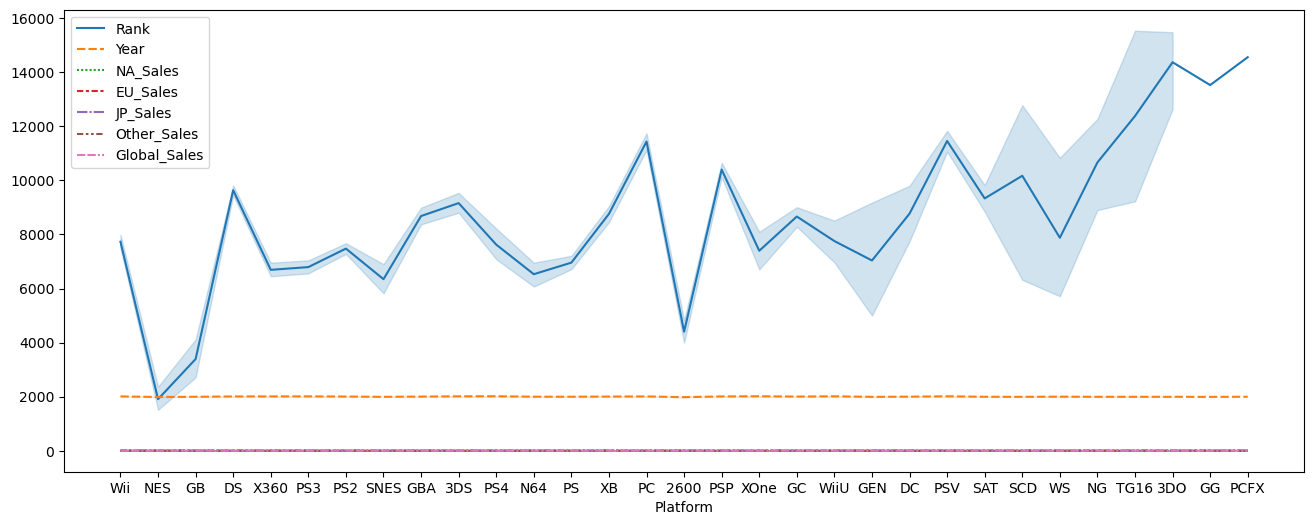

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df)

**To begin, I read the file.**


In [5]:
df.head(8) #To analyze the first 8 lines of data

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
Wii,1,Wii Sports,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
NES,2,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Wii,3,Mario Kart Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii,4,Wii Sports Resort,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
GB,5,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
GB,6,Tetris,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
DS,7,New Super Mario Bros.,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
Wii,8,Wii Play,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [6]:
df.tail(8) #To analyze the last 8 lines of data

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
PSP,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
PC,16594,Myst IV: Revelation,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
DS,16595,Plushees,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
GBA,16596,Woody Woodpecker in Crazy Castle 5,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
GC,16597,Men in Black II: Alien Escape,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
PS2,16598,SCORE International Baja 1000: The Official Game,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
DS,16599,Know How 2,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
GBA,16600,Spirits & Spells,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [7]:
df.info() #using info get details about data 

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, Wii to GBA
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


In [8]:
df.columns #this will help us for copy column name because python is case sencitive 

Index(['Rank', 'Name', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**df.describe() is a method in pandas library that returns a table of descriptive statistics, including count, mean, standard deviation, minimum value, 25th percentile, median, 75th percentile, and maximum value, for each numerical column in a DataFrame. It is a useful tool for quickly analyzing the distribution of a dataset.**

In [10]:
df.shape #shape of datagframe

(16598, 10)

In [11]:
df.isnull().sum() #check total null value in dataframe

Rank              0
Name              0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df["Year"].mode() #most frequently occurring value in the dataset of column 

0    2009.0
dtype: float64

In [13]:
df["Year"].fillna(2009.0,inplace=True) #fill the mode value in Year column 

In [14]:
df["Year"]=df["Year"].astype(int)

In [15]:
df.dtypes #each column data type

Rank              int64
Name             object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [16]:
df["Publisher"].mode()

0    Electronic Arts
dtype: object

In [17]:
df["Publisher"].fillna("Electronic Arts",inplace=True)

In [18]:
df.info() #recheck for null value now there is no null value in Year 

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, Wii to GBA
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Year          16598 non-null  int64  
 3   Genre         16598 non-null  object 
 4   Publisher     16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB


**If our dataset does not have any null values, it is easier to visualize and analyze the data because we can use all available data points. With complete data, we can create more accurate graphs and gain a better understanding of the relationships and patterns within the data. ******

In [35]:
df["Publisher"].nunique() #Total unique value check in Platform column 

578

In [36]:
df["Publisher"].value_counts() #Each Platform total number of ocuurance count 

Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

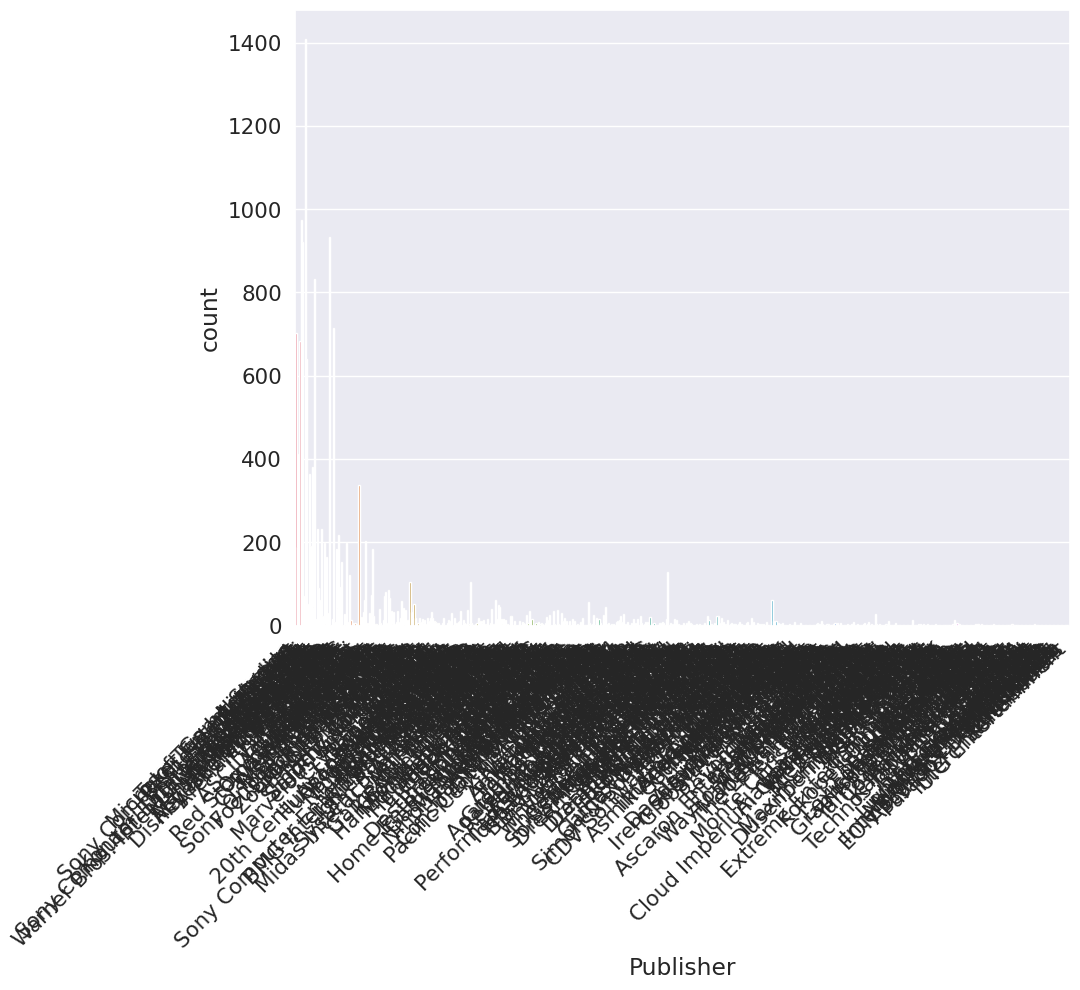

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Publisher', data = df)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [38]:
df["Publisher"].value_counts()[:5] #top 5 Platform for game release 

Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64

**This output shows the platforms in the df dataframe based on the count of occurrences of each platform in the "Platform" column.**


In [23]:
df["Year"].nunique() #Total unique value check in Year column 

39

In [24]:
df["Year"].value_counts() #Each Platform total number of ocuurance count 

2009    1702
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

****

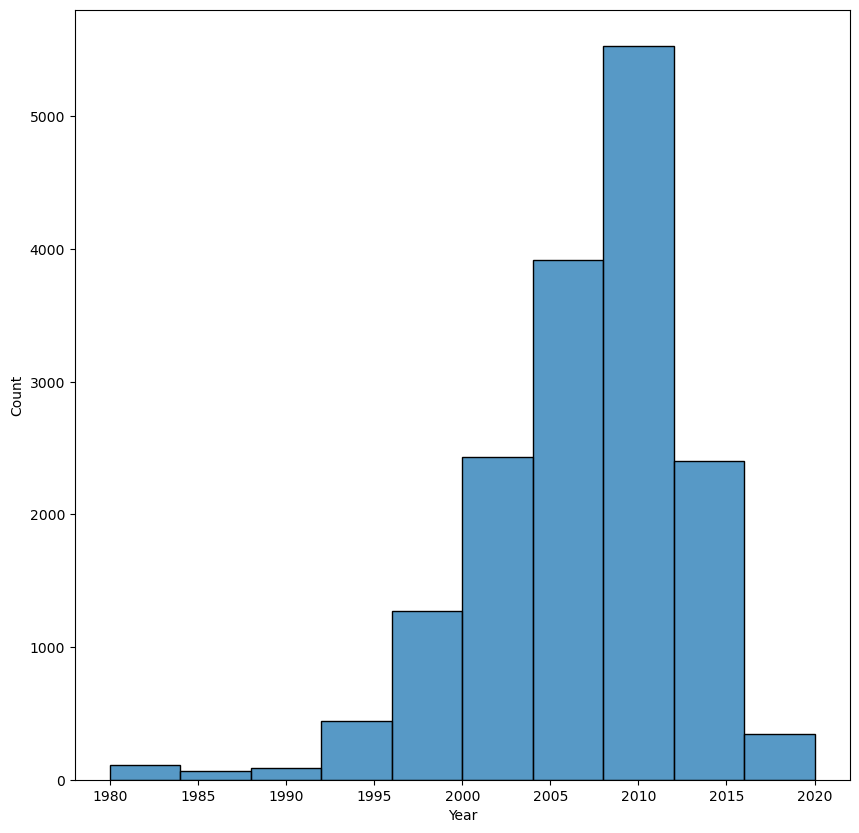

In [25]:
plt.figure(figsize = (10,10))
sns.histplot(data = df, x = "Year", bins = 10)
plt.show()

**The value_counts() method is used on the "Platform" column of the dataframe to count the number of occurrences of each platform, and the [:5] slice is used to get only the top 5 platforms.**

In [26]:
df["Genre"].nunique() #Total unique value check in Genre column 

12

In [27]:
df["Genre"].value_counts() #Each Genre total number of ocuurance count 

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Text(0.5, 1.02, 'Count of each genre sepretly')

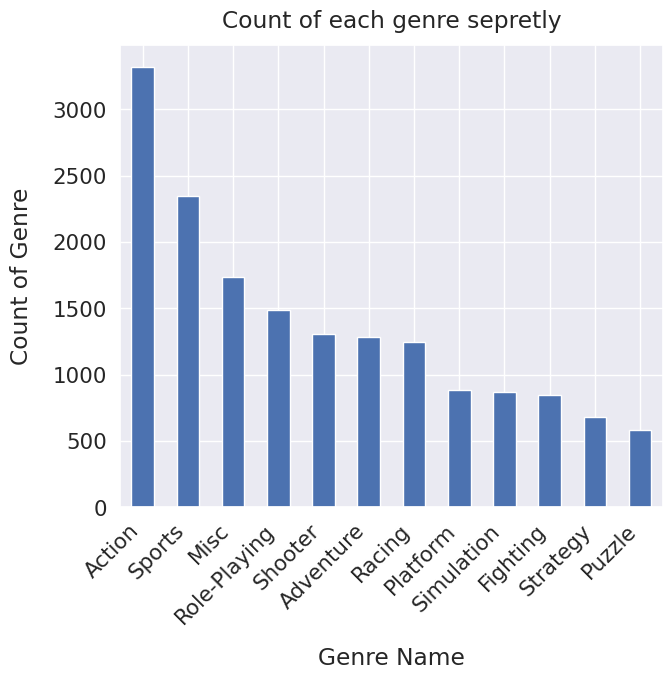

In [28]:
sns.set(font_scale=1.4)
df['Genre'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plt.xlabel("Genre Name",labelpad=14)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("Count of Genre",labelpad=14)
plt.title("Count of each genre sepretly",y=1.02)





**Action and Sports are highly popule amoug people**

In [29]:
df["Publisher"].nunique() #Total unique value check in Genre column 

578

In [30]:
df["Publisher"].value_counts() #Each Genre total number of ocuurance count 

Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [31]:
Gs=df.copy()
Gs=Gs.sort_values("Global_Sales",ascending=False).drop_duplicates(["Year"])
Gs=Gs.sort_values("Year",ascending=True).drop(["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1)
Gs=Gs.sort_values("Global_Sales",ascending=False)
Gs=Gs.reset_index(inplace=False,drop=True)
Gs


,Name,Year,Genre,Publisher,Global_Sales
0,Wii Sports,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,2008,Racing,Nintendo,35.82
3,Wii Sports Resort,2009,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,Nintendo,31.37
5,Tetris,1989,Puzzle,Nintendo,30.26
6,Duck Hunt,1984,Shooter,Nintendo,28.31
7,Nintendogs,2005,Simulation,Nintendo,24.76
8,Pokemon Gold/Pokemon Silver,1999,Role-Playing,Nintendo,23.10
9,Wii Fit,2007,Sports,Nintendo,22.72


* **Here we can see Will sports are globally high with sales**
* **Value are given of 39 year**
* **Last 2 to 3 rows show very low sales**

In [39]:
GsP=df.copy()
GsP=GsP.sort_values("Global_Sales",ascending=False).drop_duplicates(["Publisher"])
GsP=GsP.sort_values("Publisher",ascending=True).drop(["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1)
GsP=GsP.sort_values("Global_Sales",ascending=False)
GsP=GsP.reset_index(inplace=False,drop=True)
GsP

,Name,Year,Genre,Publisher,Global_Sales
0,Wii Sports,2006,Sports,Nintendo,82.74
1,Kinect Adventures!,2010,Misc,Microsoft Game Studios,21.82
2,Grand Theft Auto V,2013,Action,Take-Two Interactive,21.40
3,Gran Turismo 3: A-Spec,2001,Racing,Sony Computer Entertainment,14.98
4,Call of Duty: Modern Warfare 3,2011,Shooter,Activision,14.76
...,...,...,...,...,...
573,Farming 2017 - The Simulation,2016,Simulation,UIG Entertainment,0.01
574,Carmageddon: Max Damage,2016,Action,Stainless Games,0.01
575,Paragon,2016,Action,Epic Games,0.01
576,Empire Deluxe,1992,Strategy,New World Computing,0.01


* **Here are 31 unique platform**
* **Will platforn on top with global sales**

In [33]:
PubG = df.copy()
PubG = PubG.groupby(by="Publisher").sum().reset_index()
PubG = PubG.sort_values('Global_Sales', ascending=False).drop(["Year"],axis=1).reset_index(drop=True)
PubG1=PubG.head().copy()
PubG1.head()


,Publisher,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,2714164,816.87,418.74,455.42,95.33,1786.56
1,Electronic Arts,7727829,603.61,375.95,14.97,130.44,1125.20
2,Activision,6368325,429.70,215.53,6.54,75.34,727.46
3,Sony Computer Entertainment,4105604,265.22,187.72,74.10,80.45,607.50
4,Ubisoft,6964728,253.43,163.32,7.50,50.26,474.72


**Here we can Identify our Top 5 Publishers for the data set as:**
* Nintendo
* EA
* Activision
* Sony
* Ubisoft

Nintendo is high saler 

# Thank you for taking the time to look through my notebook :)